In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base = pd.read_csv('https://raw.githubusercontent.com/audreyemmely/ciencia-de-dados/main/projeto/dados/pessoal-forca-trabalho.csv')

In [3]:
base.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sexo,faixa_etaria,escolaridade,regime_juridico,situacao_vinculo_servidor,possui_vinculo,quantidade_forca_trabalho,remuneracao_media
0,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,2O GR COMPL OU TEC PROFISS,EST,ATIVO PERMANENTE,COM VÍNCULO,1,8789.350
1,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,2O GR COMPL OU TEC PROFISS,EST,NOMEADO CARGO COMIS.,SEM VÍNCULO,1,2701.460
2,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,SUP COMPL OU HAB LEGAL EQV,CDT,CONTRATO TEMPORARIO,COM VÍNCULO,1,8052.690
3,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,SUP COMPL OU HAB LEGAL EQV,EST,NOMEADO CARGO COMIS.,SEM VÍNCULO,5,3145.034
4,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,14,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,"MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,SUPERIOR INCOMPLETO,EST,ATIVO PERMANENTE,COM VÍNCULO,1,7048.090


In [4]:
base.shape

(36935, 17)

# Visualização e limpeza dos dados

In [5]:
# Remover acentuação dos dados das colunas

def remove_accents(input_str):
    return input_str.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

cols = base.select_dtypes(include=[np.object]).columns

base[cols] = base[cols].apply(remove_accents)

In [6]:
base.head(1)

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sexo,faixa_etaria,escolaridade,regime_juridico,situacao_vinculo_servidor,possui_vinculo,quantidade_forca_trabalho,remuneracao_media
0,14,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",MAPA,14,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",MAPA,"MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECI...",MAPA,202008,F,20 A 24 ANOS,2O GR COMPL OU TEC PROFISS,EST,ATIVO PERMANENTE,COM VINCULO,1,8789.35


In [7]:
orgaoAgrupado = base.groupby(['orgao_superior_nome']).size()
orgaoAgrupado

orgao_superior_nome
ADVOCACIA-GERAL DA UNIAO                                     488
CONTROLADORIA-GERAL DA UNIAO                                 147
MINISTERIO DA AGRICULTURA, PECUARIA E ABASTECIMENTO          792
MINISTERIO DA CIDADANIA                                      235
MINISTERIO DA CIENCIA, TECNOLOGIA E INOVACOES                819
MINISTERIO DA DEFESA                                        1258
MINISTERIO DA ECONOMIA                                      2113
MINISTERIO DA EDUCACAO                                     24300
MINISTERIO DA INFRAESTRUTURA                                 967
MINISTERIO DA JUSTICA E SEGURANCA PUBLICA                    868
MINISTERIO DA MULHER, DA FAMILIA E DOS DIREITOS HUMANOS      148
MINISTERIO DA SAUDE                                         1295
MINISTERIO DAS RELACOES EXTERIORES                           153
MINISTERIO DE MINAS E ENERGIA                                585
MINISTERIO DO DESENVOLVIMENTO REGIONAL                       551
MINIS

In [8]:
idadeAgrupada = base.groupby(['faixa_etaria']).size()
idadeAgrupada

faixa_etaria
15 A 19 ANOS         18
20 A 24 ANOS       1023
25 A 29 ANOS       3099
30 A 34 ANOS       4116
35 A 39 ANOS       4550
40 A 44 ANOS       4107
45 A 49 ANOS       3797
50 A 54 ANOS       3821
55 A 59 ANOS       4048
60 A 64 ANOS       3560
65 A 69 ANOS       2862
70 ANOS OU MAIS    1932
NAO INFORMADO         2
dtype: int64

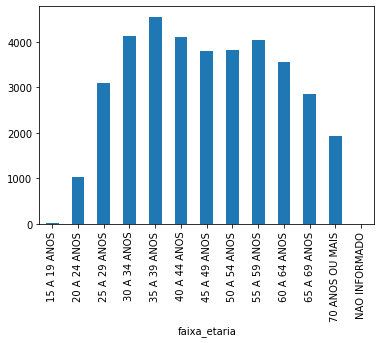

In [9]:
idadeAgrupada.plot.bar()
plt.show()

In [10]:
# Remove linhas com idades não informadas
base = base[base.faixa_etaria != 'NAO INFORMADO']

idadeAgrupada = base.groupby(['faixa_etaria']).size()
idadeAgrupada

faixa_etaria
15 A 19 ANOS         18
20 A 24 ANOS       1023
25 A 29 ANOS       3099
30 A 34 ANOS       4116
35 A 39 ANOS       4550
40 A 44 ANOS       4107
45 A 49 ANOS       3797
50 A 54 ANOS       3821
55 A 59 ANOS       4048
60 A 64 ANOS       3560
65 A 69 ANOS       2862
70 ANOS OU MAIS    1932
dtype: int64

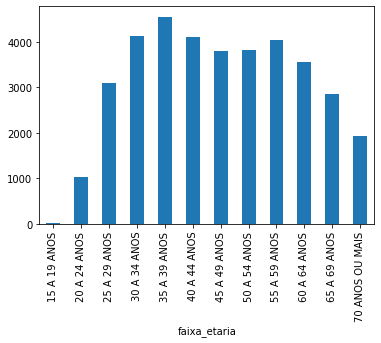

In [11]:
idadeAgrupada.plot.bar()
plt.show()

In [12]:
generoAgrupado = base.groupby(['sexo']).size()
generoAgrupado

sexo
F    17173
M    19760
dtype: int64

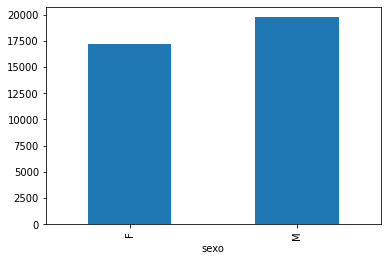

In [13]:
generoAgrupado.plot.bar()
plt.show()

In [14]:
base['remuneracao_media'].describe()

count    36933.000000
mean      6456.709124
std       5369.700347
min          0.000000
25%       3125.267000
50%       5201.040000
75%       8733.180000
max      37316.830000
Name: remuneracao_media, dtype: float64

In [15]:
# Remove linhas com remuneração media < 200  (lixo/ruido)
base = base[base.remuneracao_media >= 200]

base['remuneracao_media'].describe()

count    31947.000000
mean      7463.997482
std       5081.134252
min        201.592500
25%       3852.760000
50%       5831.210000
75%       9710.682667
max      37316.830000
Name: remuneracao_media, dtype: float64

In [16]:
base.isnull().sum()

orgao_superior_codigo_siorg    0
orgao_superior_nome            0
orgao_superior_sigla           0
orgao_codigo_siorg             0
orgao_nome                     0
orgao_sigla                    0
orgao_como_no_raiox_nome       0
orgao_como_no_raiox_sigla      0
ano_mes_referencia             0
sexo                           0
faixa_etaria                   0
escolaridade                   0
regime_juridico                0
situacao_vinculo_servidor      0
possui_vinculo                 0
quantidade_forca_trabalho      0
remuneracao_media              0
dtype: int64

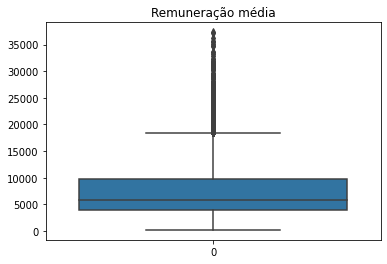

In [17]:
sns.boxplot(data = base['remuneracao_media']).set_title('Remuneração média')
plt.show()

In [18]:
base.groupby(['escolaridade']).size()

escolaridade
1O GR COMPL - 8A SER COMPL      919
1O GR INC - 1A A 4A SER INC       7
1O GR INC - 4A SERIE COMPL       19
1O GR INC - 5A A 8A SER INC     642
2O GR COMPL OU TEC PROFISS     3748
2O GR INCOMPLETO                 70
ALFABETIZ S/ CURSOS REGUL       276
ANALFABETO                        4
APERFEICOAMENTO NIV MED(T)       57
APERFEICOAMENTO NIV SUP(T)      253
AUXILIAR DE ENFERMAGEM(T)         3
BACHAREL(T)                     111
CURSO CAP/QUAL P MIN180H(T)      53
CURSO QUAL PROF MIN 180H(T)      44
CURSO QUAL PROF MIN 250H(T)      40
CURSO QUAL PROF MIN 360H(T)     348
DOUTORADO                       757
DOUTORADO(T)                   2919
ENSINO FUNDAMENTAL(T)           179
ESPECIALIZACAO (RMI) (T)          2
ESPECIALIZACAO NIV MED(T)       120
ESPECIALIZACAO NIV SUP(T)      2792
GRAD O+RSC-I(LEI12772/12(T)     166
GRADUACAO NIV SUP COMPLE(T)    2641
LICENCIATURA PLENA(T)            12
LICENCIATURA(T)                  64
MESTRADO                       1473
MESTRADO(T)    

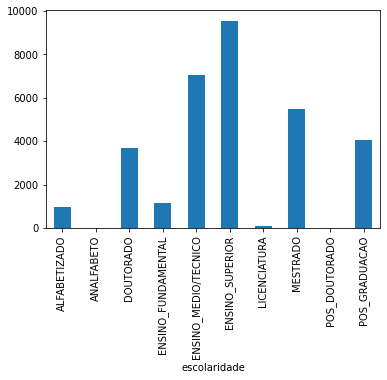

In [19]:
# Limpeza e agrupamento das classes de escolaridade

base.loc[base['escolaridade'] == '1O GR COMPL - 8A SER COMPL', 'escolaridade'] = "ENSINO_FUNDAMENTAL"
base.loc[base['escolaridade'] == '1O GR INC - 1A A 4A SER INC', 'escolaridade'] = "ALFABETIZADO"
base.loc[base['escolaridade'] == '1O GR INC - 4A SERIE COMPL', 'escolaridade'] = "ALFABETIZADO"
base.loc[base['escolaridade'] == '1O GR INC - 5A A 8A SER INC', 'escolaridade'] = "ALFABETIZADO"
base.loc[base['escolaridade'] == '2O GR COMPL OU TEC PROFISS', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == '2O GR INCOMPLETO', 'escolaridade'] = "ENSINO_FUNDAMENTAL"
base.loc[base['escolaridade'] == 'ALFABETIZ S/ CURSOS REGUL', 'escolaridade'] = "ALFABETIZADO"
base.loc[base['escolaridade'] == 'APERFEICOAMENTO NIV MED(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'APERFEICOAMENTO NIV SUP(T)', 'escolaridade'] = "ENSINO_SUPERIOR"
base.loc[base['escolaridade'] == 'AUXILIAR DE ENFERMAGEM(T)', 'escolaridade'] = "retirar" # não é uma escolaridade
base.loc[base['escolaridade'] == 'BACHAREL(T)', 'escolaridade'] = "ENSINO_SUPERIOR"
base.loc[base['escolaridade'] == 'CURSO CAP/QUAL P MIN180H(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'CURSO QUAL PROF MIN 180H(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'CURSO QUAL PROF MIN 250H(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'CURSO QUAL PROF MIN 360H(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'DOUTORADO(T)', 'escolaridade'] = "DOUTORADO"
base.loc[base['escolaridade'] == 'ENSINO FUNDAMENTAL(T)', 'escolaridade'] = "ENSINO_FUNDAMENTAL"
base.loc[base['escolaridade'] == 'ESPECIALIZACAO (RMI) (T)', 'escolaridade'] = "retirar" # não da pra saber o que é isso
base.loc[base['escolaridade'] == 'ESPECIALIZACAO NIV MED(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'ESPECIALIZACAO NIV SUP(T)', 'escolaridade'] = "POS_GRADUACAO"
base.loc[base['escolaridade'] == 'GRAD O+RSC-I(LEI12772/12(T)', 'escolaridade'] = "ENSINO_SUPERIOR"
base.loc[base['escolaridade'] == 'GRADUACAO NIV SUP COMPLE(T)', 'escolaridade'] = "ENSINO_SUPERIOR"
base.loc[base['escolaridade'] == 'LICENCIATURA PLENA(T)', 'escolaridade'] = "LICENCIATURA"
base.loc[base['escolaridade'] == 'LICENCIATURA(T)', 'escolaridade'] = "LICENCIATURA"
base.loc[base['escolaridade'] == 'MESTRADO(T)', 'escolaridade'] = "MESTRADO"
base.loc[base['escolaridade'] == 'MESTRE+RSC-III LEI 12772/12', 'escolaridade'] = "MESTRADO"
base.loc[base['escolaridade'] == 'NIVEL MEDIO(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'POS-DOUTORADO(T)', 'escolaridade'] = "POS_DOUTORADO"
base.loc[base['escolaridade'] == 'POS-GRAD O+RSC-II L12772/12', 'escolaridade'] = "POS_GRADUACAO"
base.loc[base['escolaridade'] == 'POS-GRADUACAO(T)', 'escolaridade'] = "POS_GRADUACAO"
base.loc[base['escolaridade'] == 'S/INFO', 'escolaridade'] = "retirar"
base.loc[base['escolaridade'] == 'SUP COMPL OU HAB LEGAL EQV', 'escolaridade'] = "ENSINO_SUPERIOR"
base.loc[base['escolaridade'] == 'SUPERIOR INCOMPLETO', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"
base.loc[base['escolaridade'] == 'TECNICO NIV MED COMPLETO(T)', 'escolaridade'] = "ENSINO_MEDIO/TECNICO"

# Retira os que foram marcados como 'retirar'
base = base[base.escolaridade != 'retirar']

escolaridadeAgrupada = base.groupby(['escolaridade']).size()
escolaridadeAgrupada.plot.bar()
plt.show()

# Transformação da base
Retirar a coluna "quantidade_forca_trabalho" e multiplicar a quantidade dessa linha pelo seu valor
---
Cada linha agora representará uma pessoa e não um grupo

In [20]:
base.reset_index(drop=True, inplace=True)

# resetar indexes pra corrigir os gaps das linhas que foram removidas
features = list(base.columns)

rem = [
    'orgao_superior_codigo_siorg',
    'orgao_superior_nome',
    'orgao_codigo_siorg',
    'orgao_nome',
    'orgao_como_no_raiox_nome',
    'orgao_como_no_raiox_sigla',
    'ano_mes_referencia',
    'situacao_vinculo_servidor',
    'regime_juridico',
    'possui_vinculo',
    'orgao_superior_sigla',
    'orgao_sigla'
]
base = base.drop(rem, 1)

### Cria novo dataframe

In [21]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))


In [ ]:
features = list(base.columns)
features.remove('quantidade_forca_trabalho')

print(features)
from io import StringIO
from csv import writer 

output = StringIO()
csv_writer = writer(output)

csv_writer.writerow(features)
new_base = pd.DataFrame(columns=features)

out = display(progress(0, 100), display_id=True)

for index, row in base.iterrows():
    for _ in range(row.quantidade_forca_trabalho):
        csv_writer.writerow(base[features].iloc[index])

    out.update(progress(index, len(base)))

output.seek(0) # we need to get back to the start of the StringIO
new_base = pd.read_csv(output)

new_base.head(15)

In [ ]:
# Salva arquivo no drive
from google.colab import drive
drive.mount('/content/drive')

path = 'UFAL/Ciencia de dados/Projeto/'
name = 'new_base.csv'
new_base.to_csv('/content/drive/My Drive/' + path + name)

## Carrega base transformada

In [23]:
new_base = pd.read_csv('https://raw.githubusercontent.com/audreyemmely/ciencia-de-dados/main/projeto/dados/base.csv')
new_base = new_base.drop('Unnamed: 0', 1)
new_base.head()

,sexo,faixa_etaria,escolaridade,remuneracao_media
0,F,20 A 24 ANOS,ENSINO_MEDIO/TECNICO,8789.350
1,F,20 A 24 ANOS,ENSINO_MEDIO/TECNICO,2701.460
2,F,20 A 24 ANOS,ENSINO_SUPERIOR,8052.690
3,F,20 A 24 ANOS,ENSINO_SUPERIOR,3145.034
4,F,20 A 24 ANOS,ENSINO_SUPERIOR,3145.034


In [24]:
idadeAgrupada = new_base.groupby(['faixa_etaria']).size()
idadeAgrupada

faixa_etaria
15 A 19 ANOS          11
20 A 24 ANOS        3085
25 A 29 ANOS       20778
30 A 34 ANOS       59898
35 A 39 ANOS       87873
40 A 44 ANOS       75967
45 A 49 ANOS       59832
50 A 54 ANOS       53621
55 A 59 ANOS       57196
60 A 64 ANOS       37317
65 A 69 ANOS       20432
70 ANOS OU MAIS     7416
dtype: int64

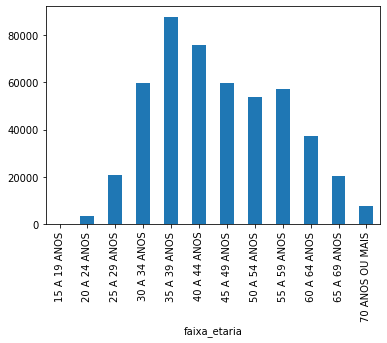

In [25]:
idadeAgrupada.plot.bar()
plt.show()

In [26]:
generoAgrupado = new_base.groupby(['sexo']).size()
generoAgrupado

sexo
F    215521
M    267905
dtype: int64

In [27]:
new_base['remuneracao_media'].describe()

count    483426.000000
mean      10488.791160
std        5842.178259
min         201.592500
25%        5709.980000
50%        9276.410000
75%       14786.717500
max       37316.830000
Name: remuneracao_media, dtype: float64

In [28]:
new_base.groupby(['escolaridade']).size()

escolaridade
ALFABETIZADO              4424
ANALFABETO                   4
DOUTORADO               100815
ENSINO_FUNDAMENTAL        5970
ENSINO_MEDIO/TECNICO     78245
ENSINO_SUPERIOR         163684
LICENCIATURA                80
MESTRADO                 69223
POS_DOUTORADO                9
POS_GRADUACAO            60972
dtype: int64

# Proposta
---
Fazer um modelo de regressão linear para estimar o salário e comparar os resultados alterando sexo / escolaridade / etc
---

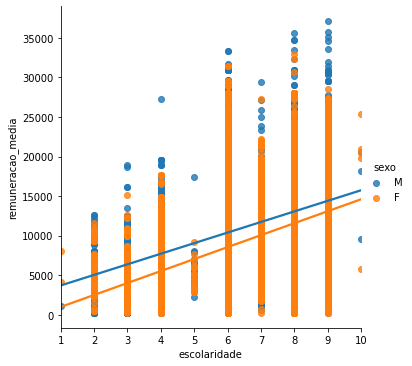

In [29]:
sample = new_base.sample(n=400000)
sample['escolaridade'].replace(to_replace=[
                                      'ANALFABETO', 
                                      'ALFABETIZADO', 
                                      'ENSINO_FUNDAMENTAL', 
                                      'ENSINO_MEDIO/TECNICO', 
                                      'LICENCIATURA', 
                                      'ENSINO_SUPERIOR', 
                                      'POS_GRADUACAO', 
                                      'MESTRADO', 
                                      'DOUTORADO',
                                      'POS_DOUTORADO'
                                    ], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

sample.head(100)
sns.lmplot(x='escolaridade', y='remuneracao_media', hue='sexo', data=sample)


## Treino

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Seleciona os dados
X = new_base[['sexo', 'faixa_etaria', 'escolaridade']]
y = new_base [['remuneracao_media']]

# Transforma os dados categoricos em OneHotEncode
encoder = OneHotEncoder()
encoder.fit(X)
X = encoder.transform(X).toarray()

# Divide entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Treina o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


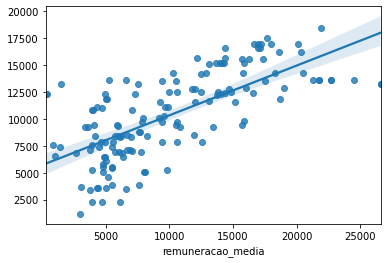

In [31]:
# Testa o modelo
predictions = model.predict(X_test)

sns.regplot(y_test[:150], predictions[:150])

## Análise

In [32]:
examples = [
  ['M', '25 A 29 ANOS',	'ENSINO_MEDIO/TECNICO'],
  ['F', '25 A 29 ANOS',	'ENSINO_MEDIO/TECNICO'],
  ['M', '50 A 54 ANOS',	'ENSINO_MEDIO/TECNICO'],
  ['F', '50 A 54 ANOS',	'ENSINO_MEDIO/TECNICO'],
  ['M', '25 A 29 ANOS',	'ENSINO_SUPERIOR'],
  ['F', '25 A 29 ANOS',	'ENSINO_SUPERIOR'],
  ['M', '50 A 54 ANOS',	'ENSINO_SUPERIOR'],
  ['F', '50 A 54 ANOS',	'ENSINO_SUPERIOR'],
  ['M', '25 A 29 ANOS',	'DOUTORADO'],
  ['F', '25 A 29 ANOS',	'DOUTORADO'],
  ['M', '50 A 54 ANOS',	'DOUTORADO'],
  ['F', '50 A 54 ANOS',	'DOUTORADO'],
  ['M', '25 A 29 ANOS',	'POS_DOUTORADO'],
  ['F', '25 A 29 ANOS',	'POS_DOUTORADO'],
  ['M', '50 A 54 ANOS',	'POS_DOUTORADO'],
  ['F', '50 A 54 ANOS',	'POS_DOUTORADO'],
]
# Transforma em OneHotEncode
converted_examples = encoder.transform(examples).toarray()

# Roda a regressão
results = model.predict(converted_examples)

for i, ex in enumerate(examples):
    print(f"Sexo: {ex[0]:3} | Idade: {ex[1]:15} | Escolaridade: {ex[2]:20} | Salario estimado: R$ {results[i][0]}")
    ex.append(results[i][0])

Sexo: M   | Idade: 25 A 29 ANOS    | Escolaridade: ENSINO_MEDIO/TECNICO | Salario estimado: R$ 1784.0
Sexo: F   | Idade: 25 A 29 ANOS    | Escolaridade: ENSINO_MEDIO/TECNICO | Salario estimado: R$ 412.0
Sexo: M   | Idade: 50 A 54 ANOS    | Escolaridade: ENSINO_MEDIO/TECNICO | Salario estimado: R$ 7840.0
Sexo: F   | Idade: 50 A 54 ANOS    | Escolaridade: ENSINO_MEDIO/TECNICO | Salario estimado: R$ 6468.0
Sexo: M   | Idade: 25 A 29 ANOS    | Escolaridade: ENSINO_SUPERIOR      | Salario estimado: R$ 7566.0
Sexo: F   | Idade: 25 A 29 ANOS    | Escolaridade: ENSINO_SUPERIOR      | Salario estimado: R$ 6194.0
Sexo: M   | Idade: 50 A 54 ANOS    | Escolaridade: ENSINO_SUPERIOR      | Salario estimado: R$ 13622.0
Sexo: F   | Idade: 50 A 54 ANOS    | Escolaridade: ENSINO_SUPERIOR      | Salario estimado: R$ 12250.0
Sexo: M   | Idade: 25 A 29 ANOS    | Escolaridade: DOUTORADO            | Salario estimado: R$ 10878.0
Sexo: F   | Idade: 25 A 29 ANOS    | Escolaridade: DOUTORADO            | Salari